# Assignment 3: PCA And t-SNE

# Import Libraries

In [1]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn import datasets

# initializing the pca
from sklearn.decomposition import PCA


# Load the MINST data

MINST data is one of the famous publicly available datasets used for machine learning projects and tasks. It is a data set of handwritten numbers. Another public dataset you have explored is the Iris dataset which you have explored in the lab. More information about the MINST data.
 
More information about the MINST dataset is found in several online resoruces, for example:
http://yann.lecun.com/exdb/mnist/

In [2]:
(x_train, y_train), (_ , _) = mnist.load_data()
X = x_train[:3000]
y = y_train[:3000]
print(X.shape)
print(y.shape)

x_mnist = reshape(x_train, [x_train.shape[0], x_train.shape[1]*x_train.shape[2]])
print(x_mnist.shape)

11490434/11490434 [==============================] - 0s 0us/step
(3000, 28, 28)
(3000,)
(60000, 784)


# Run t-SNE on the loaded MINST data and display the results

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.058s...
[t-SNE] Computed neighbors for 60000 samples in 261.340s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for s

[Text(0.5, 1.0, 'MNIST data T-SNE projection')]

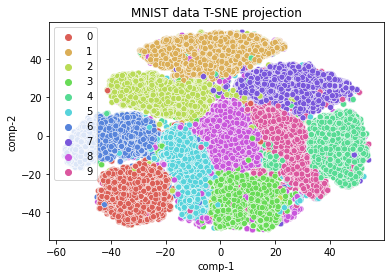

In [3]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_mnist)
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")

# Apply PCA

In [12]:
### To Do ###
# Apply PCA on the original data. Try different types of components and plot the results
############
pca = PCA(n_components=2)
train_img = pca.fit_transform(x_mnist)
print(f'train_img shape : {train_img.shape}')

pcadf = pd.DataFrame()
pcadf["y"] = y_train
pcadf["comp-1"] = z[:,0]
dd["comp-2"] = z[:,1]

print(f'Total number of components used after PCA : {pca.n_components_}')

train_img shape : (60000, 44)
Total number of components used after PCA : 44


In [ ]:


### To Do ###
# Plot a scatter plot of the PCA components
############


# Question: what are the different components you generated from PCA? Comment on the results.

In [ ]:
### To Do ###
# Apply t-SNE on the PCA components
############

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")

# Question: What did you notice from the different figures you generated? 
You can check this link for more insight (until section 4)
https://distill.pub/2016/misread-tsne/